# Unsupervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of unsupervised learning model evaluation.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 

In [15]:
from sklearn import datasets
#from sklearn.preprocessing import StandardScaler

from sklearn import cluster, datasets

data = datasets.load_wine()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
#X = StandardScaler().fit_transform(X)
y = pd.Series(data["target"])

X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


## 1. Train a KMeans clustering model on the data set using 8 clusters and compute the silhouette score for the model.

* El silhouette score va entre -1 (mala clusterización) y 1 (buena clusterización). Un 0 significa que hay overlapping.

In [3]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

In [6]:
kmeans = KMeans(n_clusters=8)
kmeans.fit(X)

y_pred = kmeans.predict(X)

c:\Users\jacom\anaconda3\envs\mlclase\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [7]:
silhouette_score(X, y_pred)

0.5406824747857601

## 2. Train a KMeans clustering model on the data set using 5 clusters and compute the silhouette score for the model.

In [8]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)

y_pred = kmeans.predict(X)
silhouette_score(X, y_pred)

c:\Users\jacom\anaconda3\envs\mlclase\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


0.5489993239795675

## 3. Train a KMeans clustering model on the data set using 3 clusters and compute the silhouette score for the model.

In [9]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

y_pred = kmeans.predict(X)
silhouette_score(X, y_pred)

c:\Users\jacom\anaconda3\envs\mlclase\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


0.5711381937868838

* A medida que baja el número de clusters de 8 -> 5 -> 3 ha ido aumentando poco a poco el silhouette score. Esto significa que 3 clusters son mejor que 8.

## 4. Use elbow curve visualizations to see if you can determine the best number of clusters to use.

The Yellowbrick library has 3 metrics that you can plot using the `metric` parameter:

- **distortion**: mean sum of squared distances to centers
- **silhouette**: mean ratio of intra-cluster and nearest-cluster distance
- **calinski_harabaz**: ratio of within to between cluster dispersion

In [11]:
#pip install yellowbrick

In [12]:
from yellowbrick.cluster import KElbowVisualizer

In [16]:
cluster.KMeans(n_clusters=4).fit(X).inertia_

c:\Users\jacom\anaconda3\envs\mlclase\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


1331903.0622637183

c:\Users\jacom\anaconda3\envs\mlclase\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\jacom\anaconda3\envs\mlclase\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\jacom\anaconda3\envs\mlclase\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\jacom\anaconda3\envs\mlclase\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` wi

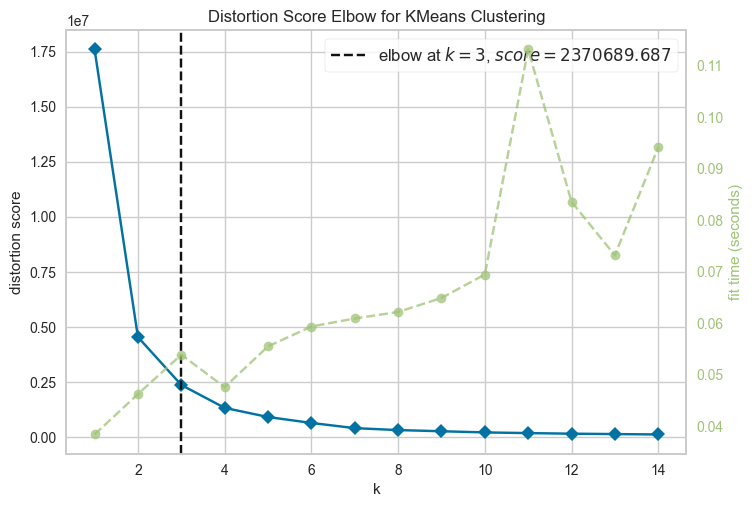

In [17]:
modelo = cluster.KMeans()

visual = KElbowVisualizer(modelo, k=(1, 15))

visual.fit(X)

visual.poof();

In [ ]:
* Parece que el mejor número de clusters es 3!

## 5. Try performing the same elbow tests with an AgglomerativeClustering model and compare the results you get to the KMeans results.

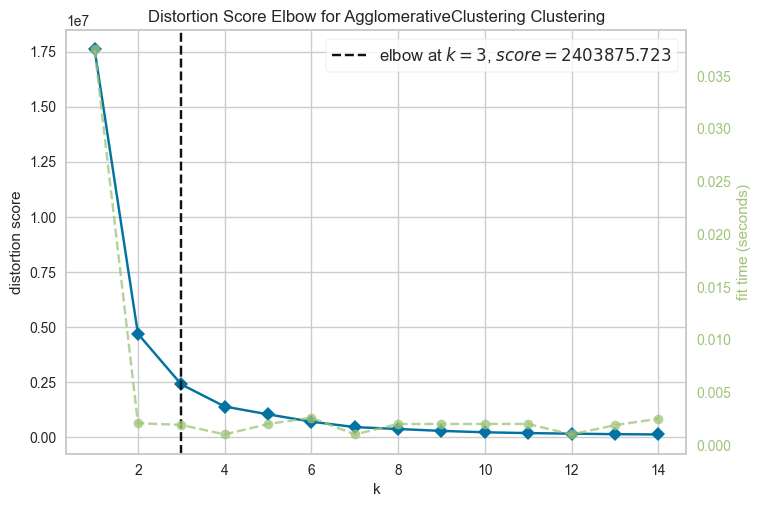

In [18]:
modelo = cluster.AgglomerativeClustering()

visual = KElbowVisualizer(modelo, k=(1, 15))

visual.fit(X)

visual.poof();

* Con clustering jerárquico se recomienda también utilizar 3 clusters también!

## 6. Create and plot a scatter matrix showing how the clusters are grouped across all the different combinations of variables in the data.

Use the model and number of clusters that returned the best result above.

## 7. Apply a PCA transform and plot the first two principle components with the plot point colors determined by cluster.

## 8. Generate a series of t-SNE plots showing the clusters at a variety of perplexities.